In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# scikit learn imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df=pd.read_csv("advertising assignment.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
from sklearn.linear_model import Ridge

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [10]:
df.shape

(200, 4)

In [11]:
len(df)

200

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


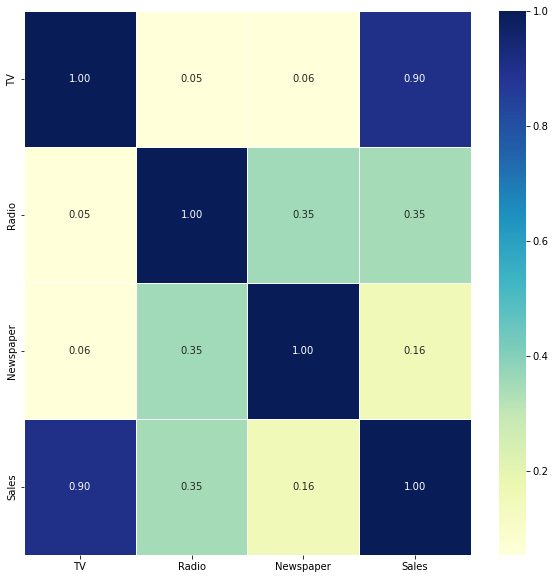

In [13]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

<AxesSubplot:ylabel='Frequency'>

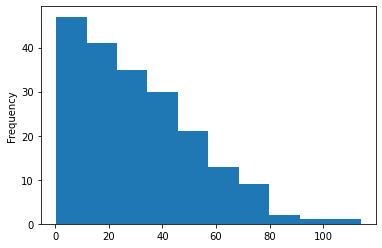

In [14]:
df.Newspaper.plot.hist()

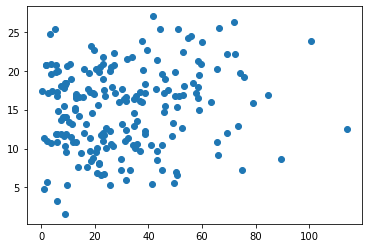

In [15]:
fig,ax=plt.subplots()
ax.scatter(df["Newspaper"],df["Sales"]);

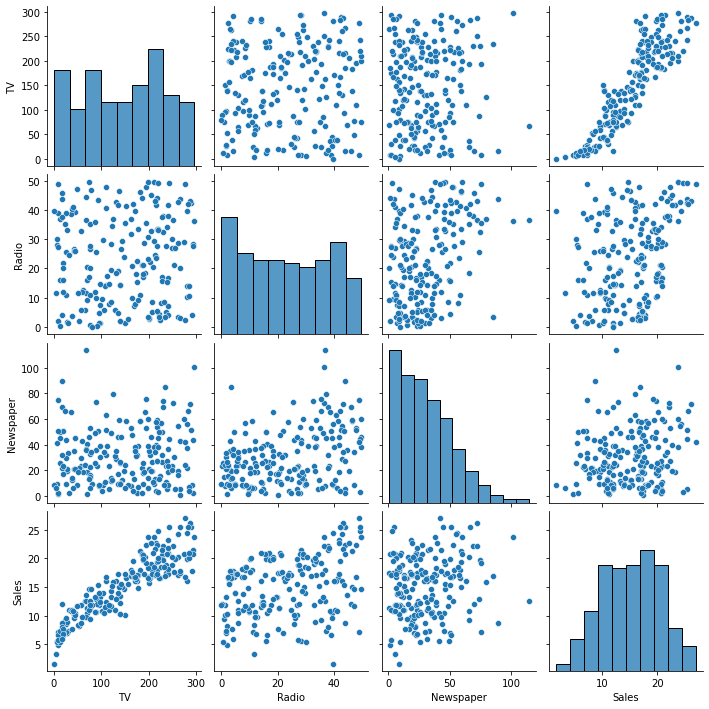

In [16]:
sns.pairplot(df);

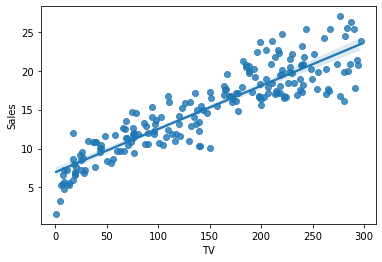

In [17]:
sns.regplot(x="TV",y="Sales",data=df);

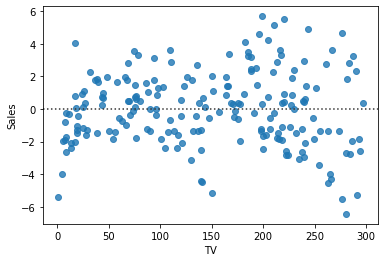

In [18]:
sns.residplot(x = "TV",
              y ="Sales",
              data=df);

C:\Users\nazin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nazin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nazin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

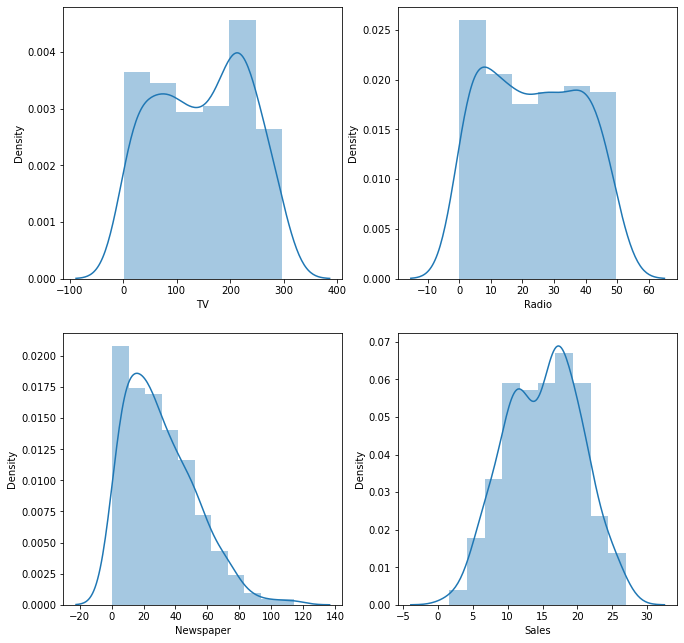

In [19]:
figure, ax = plt.subplots(2,2, figsize=(11,11))

#See the distrubution of the data
sns.distplot(df['TV'],ax= ax[0,0])
sns.distplot(df['Radio'],ax=ax[0,1])
sns.distplot(df['Newspaper'],ax= ax[1,0])
sns.distplot(df['Sales'],ax=ax[1,1]);

## modelling

In [20]:
x=df.drop("Sales",axis=1)
y=df["Sales"]

In [21]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [23]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [25]:
x_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [26]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [27]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

In [28]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rf =RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9536804118623609

In [29]:
#svm 
from sklearn import svm
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
sv=svm.SVR()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.886764963148391

In [30]:
# ridge
from sklearn.linear_model import Ridge
np.random.seed(42)
rg =Ridge()
rg.fit(x_train,y_train)
rg.score(x_test,y_test)

0.9058999159458062

In [31]:
# knearest regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
kr= KNeighborsRegressor()
kr.fit(x_train,y_train)
kr.score(x_test,y_test)

0.8991773755626823

In [32]:
# linear regression
from sklearn.linear_model import LinearRegression
np.random.seed(42)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9059011844150826

In [33]:
# models in a dictionary
models={"Linear Regression":LinearRegression(),
        "Random Forest Regression": RandomForestRegressor(),
         "Ridge": Ridge(),
         "svm":svm.SVR(),
          "kr": KNeighborsRegressor()}
# create function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given models
    models: a dict of different scikit learn machine learning 
    x_train:training data
    x_test:testing data
    y_train:traing data
    y_test:testing data
    """
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [34]:
model_scores=fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

{'Linear Regression': 0.9059011844150826,
 'Random Forest Regression': 0.9534827934927883,
 'Ridge': 0.9058999159458062,
 'svm': 0.886764963148391,
 'kr': 0.8991773755626823}

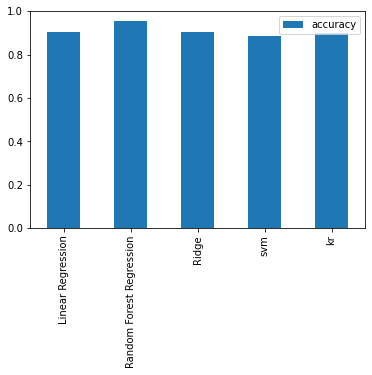

In [35]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [36]:
# tune rf
train_scores=[]
test_scores=[]
estimators=range(1,21)
rf=RandomForestRegressor()
for i in estimators:
    rf.set_params(n_estimators=i)
    rf.fit(x_train,y_train)
    train_scores.append(rf.score(x_train,y_train))
    test_scores.append(rf.score(x_test,y_test))

In [37]:
train_scores

[0.9518902019620648,
 0.9732538068351321,
 0.9775733261654889,
 0.9846356897408359,
 0.9834750808011363,
 0.9872512054030282,
 0.988614235145462,
 0.987127439817968,
 0.9864427576173046,
 0.9886667364657924,
 0.988879585849595,
 0.9873161653299684,
 0.989854980518102,
 0.9886285373753428,
 0.9891695959407194,
 0.987345741247839,
 0.9903143074973362,
 0.9900350727083376,
 0.9890138317791142,
 0.9904481038277494]

In [38]:
test_scores

[0.8874392820967537,
 0.9404005844452139,
 0.9244597189815968,
 0.9342458682700616,
 0.9243661228888292,
 0.9503928123378563,
 0.9611096335715941,
 0.9526908022691749,
 0.9326757955118542,
 0.9462114617278996,
 0.9498326853538687,
 0.9582534638285081,
 0.9528734150690601,
 0.954603566057585,
 0.9538477055293609,
 0.9496236518987189,
 0.9462041412418114,
 0.9576503848938056,
 0.9523494986072581,
 0.9487829114497542]

In [39]:
print(f"Maximum rf score on test data:{max(test_scores)*100:.2f}%")

Maximum rf score on test data:96.11%


In [40]:
# tune kr
train_scores=[]
test_scores=[]
neighbors=10,
kr=KNeighborsRegressor()
for i in neighbors:
    kr.set_params(n_neighbors=i) 
    kr.fit(x_train,y_train)
    train_scores.append(kr.score(x_train,y_train))
    test_scores.append(kr.score(x_test,y_test))

In [41]:
train_scores

[0.9165398667841465]

In [42]:
test_scores

[0.9045903705693324]

In [43]:
print(f"maximum score on test data{max(test_scores)*100:.2f}%")

maximum score on test data90.46%


In [44]:
# tune ridge
train_scores=[]
test_scores=[]
aplha=2
rg=Ridge()
for i in estimators:
    rg.set_params(alpha=i)
    rg.fit(x_train,y_train)
    train_scores.append(rg.score(x_train,y_train))
    test_scores.append(rg.score(x_test,y_test))

In [45]:
train_scores

[0.9001416005077023,
 0.9001416002721925,
 0.9001415998797176,
 0.9001415993303113,
 0.9001415986240074,
 0.9001415977608399,
 0.9001415967408424,
 0.9001415955640487,
 0.9001415942304926,
 0.9001415927402078,
 0.9001415910932281,
 0.9001415892895874,
 0.9001415873293193,
 0.9001415852124575,
 0.9001415829390357,
 0.9001415805090879,
 0.9001415779226475,
 0.9001415751797484,
 0.9001415722804241,
 0.9001415692247086]

In [46]:
test_scores

[0.9058999159458062,
 0.9058986474210292,
 0.9058973788407757,
 0.90589611020507,
 0.9058948415139365,
 0.9058935727673992,
 0.9058923039654827,
 0.9058910351082109,
 0.9058897661956081,
 0.9058884972276987,
 0.9058872282045067,
 0.9058859591260565,
 0.9058846899923723,
 0.9058834208034781,
 0.9058821515593981,
 0.9058808822601567,
 0.905879612905778,
 0.9058783434962862,
 0.9058770740317051,
 0.9058758045120595]

In [47]:
print(f"maximum score on test data:{max(test_scores)*100:.2f}%")

maximum score on test data:90.59%


In [48]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
rg.get_params()

{'alpha': 20,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [50]:
# try differet estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators")
    rf=RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test data:{rf.score(x_test,y_test)*100:.2f}%")
    print("")

trying model with 10 estimators
model accuracy on test data:94.73%

trying model with 20 estimators
model accuracy on test data:95.56%

trying model with 30 estimators
model accuracy on test data:95.58%

trying model with 40 estimators
model accuracy on test data:94.71%

trying model with 50 estimators
model accuracy on test data:95.28%

trying model with 60 estimators
model accuracy on test data:95.63%

trying model with 70 estimators
model accuracy on test data:95.44%

trying model with 80 estimators
model accuracy on test data:95.27%

trying model with 90 estimators
model accuracy on test data:95.38%



In [51]:
rf.score(x_train,y_train)

0.9914304146022629

In [52]:
rf.score(x_test,y_test)

0.9538292505948187

In [53]:
rg.score(x_train,y_train)

0.9001415692247086

In [54]:
rg.score(x_test,y_test)

0.9058758045120595

In [55]:
kr.score(x_train,y_train)

0.9165398667841465

In [56]:
kr.score(x_test,y_test)

0.9045903705693324

## evaluation metrics

In [57]:
## scoring parameter

In [58]:
# regression model evaluating metrics

In [59]:
#r^2
#MAE
#MSE

In [60]:
y_test_mean=np.full(len(y_test),y_test.mean())

In [61]:
# R^2
from sklearn.metrics import r2_score
np.random.seed(42)
rf.fit(x_train,y_train)
y_test_mean=np.full(len(y_test),y_test.mean())

In [62]:
y_test.mean()

14.329999999999998

In [63]:
y_test_mean

array([14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33])

In [64]:
r2_score(y_test,y_test_mean)

0.0

In [65]:
r2_score(y_test,y_test)

1.0

In [66]:
# r2 score for kr
from sklearn.metrics import r2_score
np.random.seed(42)
kr.fit(x_train,y_train)
y_test_mean=np.full(len(y_test),y_test.mean())

In [67]:
y_test.mean()

14.329999999999998

In [68]:
y_test_mean

array([14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33, 14.33,
       14.33, 14.33, 14.33, 14.33])

In [69]:
r2_score(y_test,y_test_mean)

0.0

In [70]:
r2_score(y_test,y_test)

1.0

In [71]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds=rf.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.9143333333333332

In [72]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values": y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head()

,actual values,predicted values,differences
95,16.9,17.275556,0.375556
15,22.4,22.393333,-0.006667
30,21.4,19.674444,-1.725556
158,7.3,6.710000,-0.590000
128,24.7,22.928889,-1.771111


In [73]:
from sklearn.metrics import mean_absolute_error
y_preds=kr.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

1.35625

In [74]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values": y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df

,actual values,predicted values,differences
95,16.9,17.03,0.13
15,22.4,19.62,-2.78
30,21.4,22.72,1.32
158,7.3,7.95,0.65
128,24.7,20.73,-3.97
115,12.6,12.61,0.01
69,22.3,20.71,-1.59
170,8.4,10.18,1.78
174,16.5,18.14,1.64
45,16.1,17.87,1.77


In [75]:
# mse
from sklearn.metrics import mean_squared_error
y_preds=rf.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

1.419012222222223

In [76]:
squared=np.square(df["differences"])
squared.mean()

2.9482625

In [77]:
y_preds=kr.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

2.9482625

In [78]:
import warnings
warnings.filterwarnings('ignore')

## hyperparameters

## random forest regressor

In [79]:
df.head()

,actual values,predicted values,differences
95,16.9,17.03,0.13
15,22.4,19.62,-2.78
30,21.4,22.72,1.32
158,7.3,7.95,0.65
128,24.7,20.73,-3.97


* randomized serch cv

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
grid={"n_estimators":[100,200,500],
     "max_depth":[None],
     "max_features":["auto","sqrt"],
     "min_samples_split":[6],
     "min_samples_leaf":[2]}
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestRegressor(),
                        param_distributions=grid,
                        cv=5,
                         verbose=True,
                        n_iter=20)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [6],
                                        'n_estimators': [100, 200, 500]},
                   verbose=True)

In [82]:
rs_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [83]:
rs_rf.score(x_test,y_test)

0.9526153194741237

## grid search cv

* random forest regressor

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid_2={"n_estimators":[100,200,500],
     "max_depth":[None],
     "max_features":["auto","sqrt"],
     "min_samples_split":[6],
     "min_samples_leaf":[1,2]}
np.random.seed(42)
rf=RandomForestRegressor(n_jobs=1)
gs_rf=GridSearchCV(estimator=rf,
                  param_grid=grid_2,
                  cv=5,
                  verbose=2)
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [86]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [87]:
gs_rf.score(x_test,y_test)

0.9528262418895891

In [88]:
gs_rf_preds=gs_rf.predict(x_test)
gs_rf_preds

array([17.32067267, 22.14374025, 19.86278858,  6.44366143, 22.57033911,
       13.52581828, 22.65278647,  9.71851596, 16.93813018, 16.95386747,
        7.41777722, 10.01730435, 17.36596873,  4.9935483 , 11.65048966,
       16.79442881,  6.09913242, 17.77646211, 11.7798617 , 19.60756069,
       19.72394007, 13.03432461, 10.28066954, 21.93175458, 11.21114316,
        9.91470601, 22.67712314, 12.4365638 , 11.62673574,  5.06316785,
       16.74517987, 11.37436755, 22.54488756,  9.18708038, 19.95116094,
       19.93791831, 11.50262377, 19.63745259, 12.33204735,  7.51173268])

## halving grid search cv 

* random forest regressor

In [90]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
param_grid={"max_depth":[3,None],
            "min_samples_split":[5,10]}
search=HalvingGridSearchCV(rf,param_grid, resource ="n_estimators",
                          max_resources=10,
                          random_state=42).fit(x,y)

In [91]:
search.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 9}

In [92]:
search.score(x_test,y_test)

0.9893276169239847